In [2]:
! pip install pysastrawi

     |████████████████████████████████| 210 kB 4.9 MB/s 


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data_covid/data/this/byu_sentiment_dataset_clean.csv')
df

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,word_length,sentiment,sentiment_value
0,1478564382783110000,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN,6,0,netral
1,1478561754284060000,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Min @byu_id tolong jawab lah. Jangan di skip.,admin jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN,3,3,positif
2,1478558087564830000,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@byu_id min beberapa hari belakangan ini kok s...,admin sinyal tidak stabil hp nokia pluslokasi ...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN,14,-3,negatif
3,1478556956310650000,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN,7,1,positif
4,1478555575197730000,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN,5,-2,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1478569346955750000,Wed Jan 05 03:29:37 +0000 2022,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",@byu_id min minta settingan APN dong,admin settingan apn,in,0,0,ErwinAvrio,NaN,NaN,byu_id,NaN,NaN,3,0,netral
2204,1476950400674630000,Fri Dec 31 16:16:30 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",jahat banget kamu nyuruh aku istirahat duluan ...,jahat banget nyuruh istirahat duluan malam,in,0,0,rmd_azhari,NaN,NaN,byu_id,NaN,NaN,6,-7,negatif
2205,1476421704427570000,Thu Dec 30 05:15:39 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Selamat tiga bulan bersama kak:) https://t.co/...,selamat kak,in,6,0,byu_id,FALSE,NaN,NaN,Indonesia,NaN,2,5,positif
2206,1476405690272860000,Thu Dec 30 04:12:01 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",LU NIAT BIKIN PROVIDER GAKSI ANJG EMOSI @byu_id,niat bikin provider gaksi anjg emosi,in,0,0,maruk0chann,NaN,NaN,byu_id,┊͙ ˘͈ᵕ˘͈,NaN,6,-2,negatif


# Using Naive Bayes

In [6]:
df.head()

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,word_length,sentiment,sentiment_value
0,1478564382783110000,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN,6,0,netral
1,1478561754284060000,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Min @byu_id tolong jawab lah. Jangan di skip.,admin jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN,3,3,positif
2,1478558087564830000,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@byu_id min beberapa hari belakangan ini kok s...,admin sinyal tidak stabil hp nokia pluslokasi ...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN,14,-3,negatif
3,1478556956310650000,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN,7,1,positif
4,1478555575197730000,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN,5,-2,negatif


In [7]:
df.sentiment_value.value_counts()

positif    1173
negatif     671
netral      364
Name: sentiment_value, dtype: int64

In [8]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.sentiment_value, test_size=0.2, stratify=df.sentiment_value)

## Using TfidfVectorizer

In [9]:
stp = StopWordRemoverFactory().get_stop_words()
vect = TfidfVectorizer()

In [10]:
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [11]:
#SMOTE

#SMOTE METHOD
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df.sentiment_value)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_train_vec, y_train)

counter = Counter(y_smote)
print('After :', counter)

Before : Counter({'positif': 1173, 'negatif': 671, 'netral': 364})
After : Counter({'positif': 938, 'netral': 938, 'negatif': 938})


In [12]:
# training naive bayes
nb = MultinomialNB()
nb.fit(X_smote, y_smote)

#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)

#SVC 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_smote, y_smote)

SVC()

In [13]:
# evaluasi
y_pred_nb = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred_nb))

y_pred_rf = rf.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf))

y_pred_svc = svc.predict(X_test_vec)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

     negatif       0.56      0.66      0.60       134
      netral       0.58      0.38      0.46        73
     positif       0.79      0.80      0.79       235

    accuracy                           0.69       442
   macro avg       0.64      0.61      0.62       442
weighted avg       0.69      0.69      0.68       442

              precision    recall  f1-score   support

     negatif       0.74      0.60      0.66       134
      netral       0.64      0.78      0.70        73
     positif       0.79      0.82      0.80       235

    accuracy                           0.75       442
   macro avg       0.72      0.73      0.72       442
weighted avg       0.75      0.75      0.74       442

              precision    recall  f1-score   support

     negatif       0.81      0.48      0.60       134
      netral       0.89      0.53      0.67        73
     positif       0.70      0.94      0.80       235

    accuracy        

## Using CountVectorizer

In [14]:
stp = StopWordRemoverFactory().get_stop_words()
vect_count = CountVectorizer()

In [15]:
X_train_vec_count = vect_count.fit_transform(X_train)
X_test_vec_count = vect_count.transform(X_test)

In [16]:
#SMOTE

#SMOTE METHOD
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df.sentiment_value)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote_count, y_smote_count = smt.fit_resample(X_train_vec_count, y_train)

counter = Counter(y_smote_count)
print('After :', counter)

Before : Counter({'positif': 1173, 'negatif': 671, 'netral': 364})
After : Counter({'positif': 938, 'netral': 938, 'negatif': 938})


In [17]:
# training naive bayes
nb = MultinomialNB()
nb.fit(X_smote_count, y_smote_count)

#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_smote_count, y_smote_count)

#SVC 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_smote_count, y_smote_count)

SVC()

In [18]:
# evaluasi
y_pred_nb = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred_nb))

y_pred_rf = rf.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf))

y_pred_svc = svc.predict(X_test_vec)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

     negatif       0.54      0.62      0.57       134
      netral       0.57      0.33      0.42        73
     positif       0.77      0.80      0.78       235

    accuracy                           0.67       442
   macro avg       0.62      0.58      0.59       442
weighted avg       0.66      0.67      0.66       442

              precision    recall  f1-score   support

     negatif       0.66      0.31      0.42       134
      netral       0.20      0.95      0.33        73
     positif       0.84      0.14      0.23       235

    accuracy                           0.32       442
   macro avg       0.57      0.46      0.33       442
weighted avg       0.68      0.32      0.31       442

              precision    recall  f1-score   support

     negatif       0.60      0.43      0.50       134
      netral       0.21      0.96      0.35        73
     positif       0.90      0.08      0.14       235

    accuracy        

# Using Deep Learning

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df.sentiment_value = df.sentiment_value.map({"netral" : 0, "positif": 1, "negatif":2})

In [21]:
df.sentiment_value.value_counts()

1    1173
2     671
0     364
Name: sentiment_value, dtype: int64

In [22]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [23]:
import random
random_index = random.randint(0, len(train_df) - 5)
for row in train_df[["clean_text", "sentiment_value"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (NETRAL)")
  elif target == 1:
    print(f"Target: {target} (POSITIF)")
  elif target == 2:
    print(f"Target: {target} (NEGATIF)")
  print(f"Teks: {text}\n")
  print("---\n")

Target: 1 (POSITIF)
Teks: gajelas pemeliharaan 

---

Target: 1 (POSITIF)
Teks: allah email tanggapan 

---

Target: 1 (POSITIF)
Teks: admin baca pesan difollowup bbrp jam laluu diproses 

---

Target: 1 (POSITIF)
Teks: ganti gadgetnya 

---

Target: 1 (POSITIF)
Teks: prenn buka pesan cepatt hm 

---



In [24]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train, y_train = train_df.clean_text, train_df.sentiment_value
X_test, y_test = test_df.clean_text, test_df.sentiment_value

def prepare_target(y_train, y_test):
  y_train_enc = to_categorical(y_train)
  y_test_enc = to_categorical(y_test)
  return y_train_enc, y_test_enc

y_train, y_test = prepare_target(y_train, y_test)

In [25]:
# split train-val
train_sent, val_sent, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                   y_train,
                                                                   test_size=0.2)

In [26]:
train_sent[:10], train_labels[:10]

(array(['tydak ramah bintang pdahal beli paket ',
        'admin beli paket internet aplikasinya dibukaaa ', 'makassar kak ',
        'cust care tidak call disuruh via media social tidak direspon ',
        'isi paket internet pembayaran via shopee pay shopeenya berhasil tidak masuk paket internet nya total masuk gigabita durasi perlu banget admin ',
        'aplikasinya tidak bisa dibuka gajelas anjing ', 'parah aslii ',
        'sa kak ',
        'admin jaringan nya lambat tidak bisa buka app nya cek paket internet ',
        'bukan surabaya om perbedaan live on xl persis telkomsel anak muda kualitas jaringannya dimuda in '],
       dtype=object), array([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32))

# Tokenization

In [27]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [28]:
round(sum([len(i.split()) for i in train_sent])/len(train_sent))

7

In [29]:
# setup text vect
max_vocab_length = 4000
max_length = 15

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [30]:
# vektorisasi teks
text_vectorization.adapt(train_sent)

In [31]:
# tweet baru
sample_tweet = "duh kenapa deh koneksi byu lemot banget"
text_vectorization([sample_tweet])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   1,  81, 119,   1,   1,  13,   0,   0,   0,   0,   0,   0,
          0,   0]])>

# Embedding

In [32]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [33]:
random_tweet = random.choice(train_sent)
print(f"Teks Asli : {random_tweet}\n")

sample_embedded = embedding(text_vectorization([random_tweet]))
sample_embedded.shape

Teks Asli : terima kasih kadonya 



TensorShape([1, 15, 128])

# Modeling

In [34]:
# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

In [35]:
# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
model_1.summary()

Model: "model_nlp_fc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 512,387
Trainable params: 512,387
Non-tr

In [37]:
val_sent.shape

(354,)

In [38]:
val_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [39]:
model_1_hist = model_1.fit(train_sent,
                           train_labels,
                           epochs=25,
                           validation_data=(val_sent, val_labels))

Epoch 1/25
45/45 [==============================] - 1s 13ms/step - loss: 1.0485 - accuracy: 0.5276 - val_loss: 1.0205 - val_accuracy: 0.5311
Epoch 2/25
45/45 [==============================] - 0s 8ms/step - loss: 0.9761 - accuracy: 0.5347 - val_loss: 0.9677 - val_accuracy: 0.5311
Epoch 3/25
45/45 [==============================] - 0s 8ms/step - loss: 0.9054 - accuracy: 0.5390 - val_loss: 0.9101 - val_accuracy: 0.5508
Epoch 4/25
45/45 [==============================] - 0s 8ms/step - loss: 0.8321 - accuracy: 0.6310 - val_loss: 0.8605 - val_accuracy: 0.6215
Epoch 5/25
45/45 [==============================] - 0s 9ms/step - loss: 0.7601 - accuracy: 0.6686 - val_loss: 0.8232 - val_accuracy: 0.6384
Epoch 6/25
45/45 [==============================] - 0s 10ms/step - loss: 0.6881 - accuracy: 0.7698 - val_loss: 0.7903 - val_accuracy: 0.6667
Epoch 7/25
45/45 [==============================] - 0s 10ms/step - loss: 0.6213 - accuracy: 0.8159 - val_loss: 0.7645 - val_accuracy: 0.6780
Epoch 8/25
45/45 

In [40]:
model_1.evaluate(val_sent, val_labels)

12/12 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.7542


[0.6984235048294067, 0.7542372941970825]

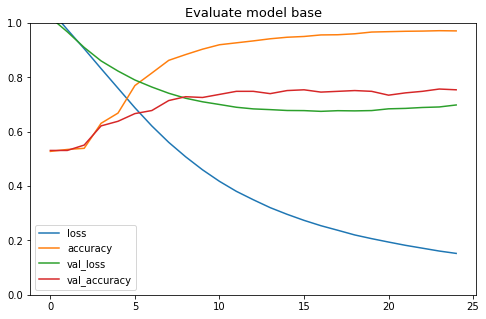

In [41]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_1_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model base', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

# LSTM

In [42]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs, name="LSTM_model")

In [43]:
model_2.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 561,603
Trainable params: 561,603
Non-trainable params: 0
__________________________________________________

In [44]:
# compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [45]:
model_2_hist = model_2.fit(train_sent,
                           train_labels,
                           epochs=15,
                           validation_data=(val_sent, val_labels))

Epoch 1/15
45/45 [==============================] - 4s 34ms/step - loss: 0.5199 - accuracy: 0.8010 - val_loss: 0.7899 - val_accuracy: 0.7542
Epoch 2/15
45/45 [==============================] - 1s 21ms/step - loss: 0.1062 - accuracy: 0.9731 - val_loss: 0.9460 - val_accuracy: 0.7458
Epoch 3/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0803 - accuracy: 0.9780 - val_loss: 0.9542 - val_accuracy: 0.7373
Epoch 4/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0623 - accuracy: 0.9851 - val_loss: 0.9647 - val_accuracy: 0.7260
Epoch 5/15
45/45 [==============================] - 1s 20ms/step - loss: 0.0521 - accuracy: 0.9873 - val_loss: 1.0886 - val_accuracy: 0.7373
Epoch 6/15
45/45 [==============================] - 1s 20ms/step - loss: 0.0436 - accuracy: 0.9894 - val_loss: 1.1028 - val_accuracy: 0.7401
Epoch 7/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 1.2303 - val_accuracy: 0.7288
Epoch 8/15
45

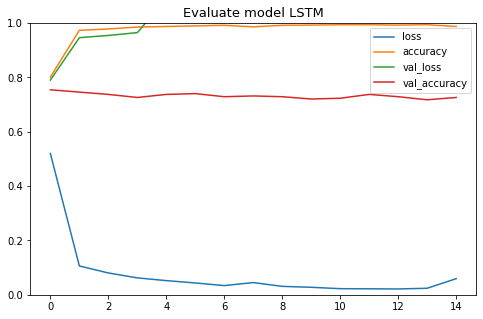

In [46]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_2_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model LSTM', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

# GRU

In [47]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs, name="GRU_model")

In [48]:
# compile model
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
model_3.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 549,443
Trainable params: 549,443
Non-trainable params: 0
___________________________________________________

In [50]:
model_3_hist = model_3.fit(train_sent,
                           train_labels,
                           epochs=15,
                           validation_data=(val_sent, val_labels))

Epoch 1/15
45/45 [==============================] - 4s 33ms/step - loss: 0.7762 - accuracy: 0.6310 - val_loss: 1.1065 - val_accuracy: 0.6215
Epoch 2/15
45/45 [==============================] - 1s 20ms/step - loss: 0.2709 - accuracy: 0.8725 - val_loss: 1.0262 - val_accuracy: 0.7373
Epoch 3/15
45/45 [==============================] - 1s 20ms/step - loss: 0.0802 - accuracy: 0.9766 - val_loss: 1.1365 - val_accuracy: 0.7373
Epoch 4/15
45/45 [==============================] - 1s 20ms/step - loss: 0.0414 - accuracy: 0.9887 - val_loss: 1.1936 - val_accuracy: 0.7373
Epoch 5/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 1.2151 - val_accuracy: 0.7373
Epoch 6/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0241 - accuracy: 0.9936 - val_loss: 1.3987 - val_accuracy: 0.7514
Epoch 7/15
45/45 [==============================] - 1s 21ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 1.3244 - val_accuracy: 0.7571
Epoch 8/15
45

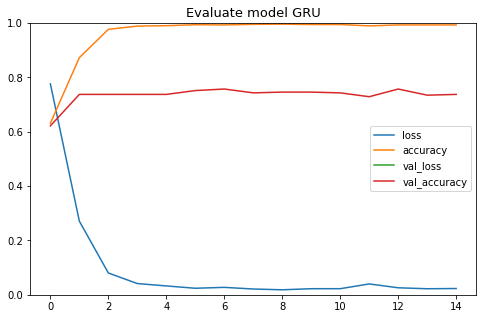

In [51]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_3_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model GRU', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
# inference new data

tweet_baru = [
            "anjirr lemot banget",
            "kenapa maintenance nya harus malem tahun baru sih, kesel deh",
            "wahh terima kasih byu udah dikasih kado kuota, jadi suka deh",
            "mohon maaf byu ini kenapa ya",
            "mohon dibenarkan aplikasinya, saya komplain gak dibalas di dm",
            "lemot banget, niat bikin provider gaksi"
]

hasil = model_3.predict(tweet_baru)
hasil.argmax(axis=1)

array([2, 2, 1, 1, 0, 2])